In [2]:
import pandas as pd
df=pd.read_csv('red_spider_mite_forecast_data.csv')
df.head()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label,humidity_sensor_temp,...,target_count_14d,target_outbreak_14d,target_category_14d,target_count_30d,target_outbreak_30d,target_category_30d,temp_humid_interaction,rain_temp_interaction,optimal_growth_condition,recent_pesticide
0,1998-03-02,72,40,38,20.414470,82.208026,7.592491,245.151130,rice,19.604129,...,1.0,0,Low,0.0,0,Low,16.782333,500.463047,0,0
1,1998-03-03,83,58,45,25.755286,83.518271,5.875346,245.662680,rice,21.071705,...,0.0,0,Low,0.0,0,Low,21.510370,632.711261,0,0
2,1998-03-04,93,58,38,20.615214,83.773456,6.932400,279.545172,rice,16.468325,...,0.0,0,Low,1.0,0,Low,17.270077,576.288360,0,0
3,1998-03-05,70,36,42,21.841069,80.728864,6.946210,202.383832,rice,16.018967,...,0.0,0,Low,0.0,0,Low,17.632047,442.027919,0,0
4,1998-03-06,76,47,42,20.083696,83.291147,5.739175,263.637218,rice,26.062629,...,0.0,0,Low,0.0,0,Low,16.727941,529.480984,0,0


In [3]:
df['Red_spider_mite_category'].value_counts()

,count
Red_spider_mite_category,
Low,8650
Medium,1062
High,228


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label,humidity_sensor_temp,pressure,vapor_pressure,rain_bucket_capacity,rain_bucket_tpm,fallen_rain_mm,wind_speed_mps,wind_direction,wind_gust_mps,wind_north_mps,wind_east_mps,latitude,longitude,x_orientation,y_orientation,air_temp,Red_spider_mite_count,Red_spider_mite_category,Pesticide_active,Resistance_level,Predation_pressure,Red_spider_mite_count_lag_1,Red_spider_mite_count_lag_3,Red_spider_mite_count_lag_7,Red_spider_mite_count_lag_14,Red_spider_mite_count_lag_21,Red_spider_mite_count_lag_30,temperature_lag_1,temperature_lag_3,temperature_lag_7,temperature_lag_14,temperature_lag_21,temperature_lag_30,humidity_lag_1,humidity_lag_3,humidity_lag_7,humidity_lag_14,humidity_lag_21,humidity_lag_30,rainfall_lag_1,rainfall_lag_3,rainfall_lag_7,rainfall_lag_14,rainfall_lag_21,rainfall_lag_30,Pesticide_active_lag_1,Pesticide_active_lag_3,Pesticide_active_lag_7,Pesticide_active_lag_14,Pesticide_active_lag_21,Pesticide_active_lag_30,Resistance_level_lag_1,Resistance_level_lag_3,Resistance_level_lag_7,Resistance_level_lag_14,Resistance_level_lag_21,Resistance_level_lag_30,wind_speed_mps_lag_1,wind_speed_mps_lag_3,wind_speed_mps_lag_7,wind_speed_mps_lag_14,wind_speed_mps_lag_21,wind_speed_mps_lag_30,pressure_lag_1,pressure_lag_3,pressure_lag_7,pressure_lag_14,pressure_lag_21,pressure_lag_30,vapor_pressure_lag_1,vapor_pressure_lag_3,vapor_pressure_lag_7,vapor_pressure_lag_14,vapor_pressure_lag_21,vapor_pressure_lag_30,count_roll_mean_3,count_roll_max_3,count_roll_min_3,count_roll_std_3,count_growth_rate_3,temperature_roll_mean_3,temperature_roll_std_3,temperature_roll_max_3,temperature_roll_min_3,temperature_extrema_3,humidity_roll_mean_3,humidity_roll_std_3,humidity_roll_max_3,humidity_roll_min_3,rainfall_roll_mean_3,rainfall_roll_std_3,rainfall_roll_sum_3,rainfall_roll_max_3,rainy_days_3,wind_speed_mps_roll_mean_3,wind_speed_mps_roll_std_3,pressure_roll_mean_3,pressure_roll_std_3,vapor_pressure_roll_mean_3,vapor_pressure_roll_std_3,count_roll_mean_7,count_roll_max_7,count_roll_min_7,count_roll_std_7,count_growth_rate_7,temperature_roll_mean_7,temperature_roll_std_7,temperature_roll_max_7,temperature_roll_min_7,temperature_extrema_7,humidity_roll_mean_7,humidity_roll_std_7,humidity_roll_max_7,humidity_roll_min_7,rainfall_roll_mean_7,rainfall_roll_std_7,rainfall_roll_sum_7,rainfall_roll_max_7,rainy_days_7,wind_speed_mps_roll_mean_7,wind_speed_mps_roll_std_7,pressure_roll_mean_7,pressure_roll_std_7,vapor_pressure_roll_mean_7,vapor_pressure_roll_std_7,count_roll_mean_14,count_roll_max_14,count_roll_min_14,count_roll_std_14,count_growth_rate_14,temperature_roll_mean_14,temperature_roll_std_14,temperature_roll_max_14,temperature_roll_min_14,temperature_extrema_14,humidity_roll_mean_14,humidity_roll_std_14,humidity_roll_max_14,humidity_roll_min_14,rainfall_roll_mean_14,rainfall_roll_std_14,rainfall_roll_sum_14,rainfall_roll_max_14,rainy_days_14,wind_speed_mps_roll_mean_14,wind_speed_mps_roll_std_14,pressure_roll_mean_14,pressure_roll_std_14,vapor_pressure_roll_mean_14,vapor_pressure_roll_std_14,count_roll_mean_30,count_roll_max_30,count_roll_min_30,count_roll_std_30,count_growth_rate_30,temperature_roll_mean_30,temperature_roll_std_30,temperature_roll_max_30,temperature_roll_min_30,temperature_extrema_30,humidity_roll_mean_30,humidity_roll_std_30,humidity_roll_max_30,humidity_roll_min_30,rainfall_roll_mean_30,rainfall_roll_std_30,rainfall_roll_sum_30,rainfall_roll_max_30,rainy_days_30,wind_speed_mps_roll_mean_30,wind_speed_mps_roll_std_30,pressure_roll_mean_30,pressure_roll_std_30,vapor_pressure_roll_mean_30,vapor_pressure_roll_std_30,count_roll_mean_60,count_roll_max_60,count_roll_min_60,count_roll_std_60,count_growth_rate_60,temperature_roll_mean_60,temperature_roll_std_60,temperature_roll_max_60,temperature_roll_min_60,temperature_extrema_60,humidity_roll_mean_60,humidity_roll_std_60,humidity_roll_max_60,humidity_roll_min_60,rainfall_roll_mean_60,rainfall_roll_std_60,rainfall_roll_sum_60

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('red_spider_mite_forecast_data.csv')

# 1. Handle the date column
# Assuming 'Unnamed: 0' is the date column
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Date')
df = df.drop(columns=['Unnamed: 0']) # Drop the original date column
df = df.sort_index() # Ensure data is sorted chronologically

print("DataFrame Info before cleaning:")
df.info()

# 2. Check for initial NaNs (often caused by lags/rolling windows)
print(f"\nInitial shape: {df.shape}")
print(f"Number of NaNs per column (first few rows):\n{df.head().isnull().sum()}")

# Let's see how many rows have NaNs, likely concentrated at the start
rows_with_nans = df.isnull().any(axis=1).sum()
print(f"\nTotal number of rows with any NaN values: {rows_with_nans}")

# If NaNs are primarily at the start due to rolling windows/lags,
# a common strategy is to drop these initial rows.
# Let's find the first row without NaNs. We need to consider all columns
# that could have NaNs from feature engineering (lags up to 30, rolling up to 60).
# The rolling window of 60 days is the longest dependency.
first_valid_index = df.first_valid_index()
print(f"\nFirst valid index (pandas guess): {first_valid_index}")

# Let's be more conservative and drop based on the longest window (60 days/periods)
# Assuming daily data, we might need to drop roughly the first 60 entries.
# Let's check the first 70 rows for NaNs in a potentially problematic column
print(f"\nNaNs in 'count_roll_mean_60' in first 70 rows: {df['count_roll_mean_60'].head(70).isnull().sum()}")

# Drop rows with NaN values - often the cleanest way for initial NAs from feature engineering
df_cleaned = df.dropna()
print(f"\nShape after dropping NaNs: {df_cleaned.shape}")
print(f"Number of rows dropped: {df.shape[0] - df_cleaned.shape[0]}")

# Check if any NaNs remain
print(f"\nNaNs remaining after dropna(): {df_cleaned.isnull().sum().sum()}")

# 3. Define Target (y) and Features (X)
TARGET_VARIABLE = 'Red_spider_mite_count'

# Features: Start with all columns, then drop target-related and potentially others
features = df_cleaned.columns.tolist()

# Columns to remove from features:
# - The target variable itself
# - Columns directly derived from the current target (e.g., category)
# - Future target values (leakage)
# - Potentially other identifiers or highly correlated/redundant features (TBD)
cols_to_remove = [
    TARGET_VARIABLE,
    'Red_spider_mite_category', # Derived directly from the target count
    # All future target columns
    'target_count_1d', 'target_outbreak_1d', 'target_category_1d',
    'target_count_7d', 'target_outbreak_7d', 'target_category_7d',
    'target_count_14d', 'target_outbreak_14d', 'target_category_14d',
    'target_count_30d', 'target_outbreak_30d', 'target_category_30d',
    # 'label' might be crop type - let's keep it for now, but check its values
]

# Ensure all columns to remove actually exist in the dataframe before trying to remove
existing_cols_to_remove = [col for col in cols_to_remove if col in features]

features = [col for col in features if col not in existing_cols_to_remove]

# Check the 'label' column - if it's constant or needs encoding
print(f"\nUnique values in 'label' column: {df_cleaned['label'].unique()}")
# If 'label' is categorical, we'll need to encode it later.

X = df_cleaned[features]
y = df_cleaned[TARGET_VARIABLE]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"\nFirst 5 rows of features (X):")
print(X.head())
print(f"\nFirst 5 values of target (y):")
print(y.head())

# Store cleaned data and features list for next steps
%store df_cleaned
%store features
%store TARGET_VARIABLE

DataFrame Info before cleaning:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9940 entries, 1998-03-02 to 2025-05-18
Columns: 235 entries, N to recent_pesticide
dtypes: float64(211), int64(18), object(6)
memory usage: 17.9+ MB

Initial shape: (9940, 235)
Number of NaNs per column (first few rows):
N                           0
P                           0
K                           0
temperature                 0
humidity                    0
                           ..
target_category_30d         0
temp_humid_interaction      0
rain_temp_interaction       0
optimal_growth_condition    0
recent_pesticide            0
Length: 235, dtype: int64

Total number of rows with any NaN values: 0

First valid index (pandas guess): 1998-03-02 00:00:00

NaNs in 'count_roll_mean_60' in first 70 rows: 0

Shape after dropping NaNs: (9940, 235)
Number of rows dropped: 0

NaNs remaining after dropna(): 0

Unique values in 'label' column: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 

No NaNs: Excellent, it seems the dataset was already prepared to handle the initial missing values from lags/rolling windows. We have the full 9940 data points available.

Target: The target Red_spider_mite_count starts at 0. We should probably check the distribution of this variable later, as many zeros or a skewed distribution can influence model choice and evaluation.

Categorical Feature: The label column has 27 unique crop types. We need to convert this into a numerical format that models can understand. One-Hot Encoding is a suitable method for this, as it doesn't impose an arbitrary order on the crops.

Features: We have 221 features after removing the target-related ones.

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# Assuming 'df_cleaned' holds the original data from Step 1 output
# And 'TARGET_VARIABLE' is still 'Red_spider_mite_count'

# --- 1. Define New Target: Binary Outbreak Risk ---
# Define a threshold for what constitutes a 'risk' state.
# Let's use the 75th percentile as an example threshold, or choose a fixed number.
risk_threshold = df_cleaned[TARGET_VARIABLE].quantile(0.75)
# Or choose a domain-specific threshold, e.g., risk_threshold = 5
print(f"Using risk threshold (>{risk_threshold}) for 'is_outbreak_risk'")

target_risk_col = 'is_outbreak_risk_1d' # Predict risk for next day

# We need to shift the count data to create the target for the *next* day
df_cleaned[target_risk_col] = (df_cleaned[TARGET_VARIABLE].shift(-1) > risk_threshold).astype(int)

# Drop the last row where the shifted target is NaN
df_prepared_risk = df_cleaned.dropna(subset=[target_risk_col])

y_risk = df_prepared_risk[target_risk_col]

# --- 2. Define New Feature Set (Sensor/Environment Only) ---

# Start with all columns from the risk-prepared dataframe
all_cols = df_prepared_risk.columns.tolist()

# Identify columns to EXCLUDE (count-based and future targets)
count_related_cols = [col for col in all_cols if 'count' in col.lower()] # Catch all count lags, rolls, etc.
future_target_cols = [col for col in all_cols if 'target_' in col.lower() and col != target_risk_col] # Exclude pre-calculated future targets

# Also explicitly exclude the original target variable and its category if present
other_to_exclude = [TARGET_VARIABLE, 'Red_spider_mite_category']

cols_to_exclude_for_risk_model = list(set(count_related_cols + future_target_cols + other_to_exclude))

# Define the features to USE (all columns minus the excluded ones)
sensor_features = [col for col in all_cols if col not in cols_to_exclude_for_risk_model and col != target_risk_col]

# Double-check: ensure constant columns previously dropped are not included
constant_cols_to_remove = ['latitude', 'longitude', 'rain_bucket_capacity']
sensor_features = [col for col in sensor_features if col not in constant_cols_to_remove]


# Create the sensor-only feature matrix
X_sensor_only = df_prepared_risk[sensor_features]

# Handle categorical 'label' feature (must be done again on this subset)
if 'label' in X_sensor_only.columns:
    print("Encoding 'label' feature...")
    encoder_risk = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_labels_risk = encoder_risk.fit_transform(X_sensor_only[['label']])
    encoded_df_risk = pd.DataFrame(encoded_labels_risk, index=X_sensor_only.index, columns=encoder_risk.get_feature_names_out(['label']))
    X_sensor_only = X_sensor_only.drop(columns=['label'])
    X_sensor_only = pd.concat([X_sensor_only, encoded_df_risk], axis=1)
    print(f"Shape after encoding 'label': {X_sensor_only.shape}")
    # Update feature list
    sensor_features = X_sensor_only.columns.tolist()
else:
     sensor_features = X_sensor_only.columns.tolist() # If label wasn't there

print(f"\nShape of Sensor-Only Features (X_sensor_only): {X_sensor_only.shape}")
print(f"Shape of Risk Target (y_risk): {y_risk.shape}")
print(f"\nNumber of features for risk model: {len(sensor_features)}")
# print("Example Sensor-Only Features:")
# print(sensor_features[:10]) # Print first few feature names
# print(sensor_features[-10:]) # Print last few

assert TARGET_VARIABLE not in sensor_features, f"'{TARGET_VARIABLE}' still in features!"
assert 'Red_spider_mite_count_lag_1' not in sensor_features, "Count lag feature still present!"
assert 'count_roll_mean_3' not in sensor_features, "Count roll feature still present!"
assert 'target_count_7d' not in sensor_features, "Future target leak still present!"

Using risk threshold (>5.0) for 'is_outbreak_risk'
Encoding 'label' feature...
Shape after encoding 'label': (9940, 213)

Shape of Sensor-Only Features (X_sensor_only): (9940, 213)
Shape of Risk Target (y_risk): (9940,)

Number of features for risk model: 213


In [8]:
from sklearn.model_selection import train_test_split

# Use the same split ratio as before
test_size_ratio = 0.20
n_total_risk = len(X_sensor_only)
n_test_risk = int(n_total_risk * test_size_ratio)
n_train_risk = n_total_risk - n_test_risk

print(f"Risk Model - Total samples: {n_total_risk}")
print(f"Risk Model - Training samples: {n_train_risk}")
print(f"Risk Model - Test samples: {n_test_risk}")

# Split features (X_sensor_only) and target (y_risk) chronologically
X_train_risk = X_sensor_only.iloc[:n_train_risk]
X_test_risk = X_sensor_only.iloc[n_train_risk:]
y_train_risk = y_risk.iloc[:n_train_risk]
y_test_risk = y_risk.iloc[n_train_risk:]

print("\nRisk Model - Shapes of splits:")
print(f"X_train_risk: {X_train_risk.shape}, y_train_risk: {y_train_risk.shape}")
print(f"X_test_risk: {X_test_risk.shape}, y_test_risk: {y_test_risk.shape}")

# Verify the split dates
print(f"\nRisk Model - Training data ends on: {X_train_risk.index.max()}")
print(f"Risk Model - Test data starts on: {X_test_risk.index.min()}")
print(f"Risk Model - Test data ends on: {X_test_risk.index.max()}")

# Check the distribution of the target in train/test sets (important for classification)
print(f"\nRisk Target Distribution (Train): \n{y_train_risk.value_counts(normalize=True)}")
print(f"Risk Target Distribution (Test): \n{y_test_risk.value_counts(normalize=True)}")

Risk Model - Total samples: 9940
Risk Model - Training samples: 7952
Risk Model - Test samples: 1988

Risk Model - Shapes of splits:
X_train_risk: (7952, 213), y_train_risk: (7952,)
X_test_risk: (1988, 213), y_test_risk: (1988,)

Risk Model - Training data ends on: 2019-12-08 00:00:00
Risk Model - Test data starts on: 2019-12-09 00:00:00
Risk Model - Test data ends on: 2025-05-18 00:00:00

Risk Target Distribution (Train): 
is_outbreak_risk_1d
0    0.798541
1    0.201459
Name: proportion, dtype: float64
Risk Target Distribution (Test): 
is_outbreak_risk_1d
0    0.729376
1    0.270624
Name: proportion, dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize a new scaler for the risk model features
scaler_risk = StandardScaler()

# Fit the scaler ONLY on the training data (X_train_risk)
# Use the correct list of feature names for the risk model
sensor_features_list = X_train_risk.columns.tolist()
scaler_risk.fit(X_train_risk[sensor_features_list])

# Transform both training and test data
X_train_risk_scaled = X_train_risk.copy()
X_test_risk_scaled = X_test_risk.copy()

X_train_risk_scaled[sensor_features_list] = scaler_risk.transform(X_train_risk[sensor_features_list])
X_test_risk_scaled[sensor_features_list] = scaler_risk.transform(X_test_risk[sensor_features_list])

print("\nFirst 5 rows of scaled training data (X_train_risk_scaled):")
print(X_train_risk_scaled.head())


First 5 rows of scaled training data (X_train_risk_scaled):
                   N         P         K  temperature  humidity        ph  \
Date                                                                        
1998-03-02  0.938254 -0.643190 -0.321988    -0.732315  0.676345  2.026285   
1998-03-03  1.409028  0.250927 -0.094710     0.049922  0.750157 -1.065152   
1998-03-04  1.837004  0.250927 -0.321988    -0.702913  0.764533  0.837901   
1998-03-05  0.852659 -0.841883 -0.192115    -0.523370  0.593016  0.862763   
1998-03-06  1.109445 -0.295478 -0.192115    -0.780761  0.737362 -1.310305   

            rainfall  humidity_sensor_temp  pressure  vapor_pressure  \
Date                                                                   
1998-03-02  4.251773             -0.697402  0.644786       -0.390032   
1998-03-03  4.261759             -0.487154  0.597743        0.023819   
1998-03-04  4.923191             -1.146643  1.803381       -0.606421   
1998-03-05  3.416897             -1.211

Training Logistic Regression...
Logistic Regression F1: 0.8323, AUC: 0.9586
Training Time: 1.82 seconds

Training Random Forest Classifier...
Random Forest F1: 0.6936, AUC: 0.8940
Training Time: 9.80 seconds

Training Gradient Boosting Classifier (sklearn)...
Gradient Boosting (sklearn) F1: 0.7947, AUC: 0.9307
Training Time: 97.52 seconds

Training XGBoost Classifier...
Calculated scale_pos_weight for XGBoost: 3.96


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost F1: 0.7633, AUC: 0.9389
Training Time: 8.21 seconds

Training LightGBM Classifier...
[LightGBM] [Info] Number of positive: 1602, number of negative: 6350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39839
[LightGBM] [Info] Number of data points in the train set: 7952, number of used features: 206
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201459 -> initscore=-1.377202
[LightGBM] [Info] Start training from score -1.377202
LightGBM F1: 0.7997, AUC: 0.9486
Training Time: 4.56 seconds


--- Risk Model Comparison (Sorted by AUC) ---
                             Accuracy  Precision    Recall  F1 Score  \
Logistic Regression          0.914487   0.886555  0.784387  0.832347   
LightGBM                     0.881288   0.735938  0.875465  0.799660   
XGBoost                      0.850604   0.668061  0.890335  0.763347   
Gradient Boosting

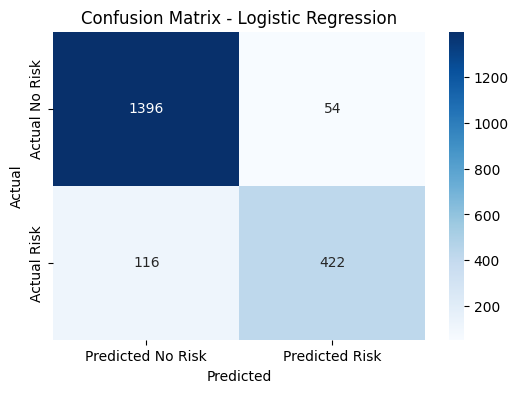


Classification Report for Best Risk Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1450
           1       0.89      0.78      0.83       538

    accuracy                           0.91      1988
   macro avg       0.90      0.87      0.89      1988
weighted avg       0.91      0.91      0.91      1988



In [10]:
import time
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store risk models and their results
models_risk = {}
results_risk = {}

# --- 1. Logistic Regression (Baseline Classifier) ---
print("Training Logistic Regression...")
start_time = time.time()
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear') # liblinear good for smaller datasets
log_reg.fit(X_train_risk_scaled, y_train_risk)
log_reg_preds = log_reg.predict(X_test_risk_scaled)
log_reg_proba = log_reg.predict_proba(X_test_risk_scaled)[:, 1] # Probabilities for AUC
end_time = time.time()

models_risk['Logistic Regression'] = log_reg
results_risk['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test_risk, log_reg_preds),
    'Precision': precision_score(y_test_risk, log_reg_preds),
    'Recall': recall_score(y_test_risk, log_reg_preds),
    'F1 Score': f1_score(y_test_risk, log_reg_preds),
    'AUC': roc_auc_score(y_test_risk, log_reg_proba),
    'Training Time (s)': end_time - start_time
}
print(f"Logistic Regression F1: {results_risk['Logistic Regression']['F1 Score']:.4f}, AUC: {results_risk['Logistic Regression']['AUC']:.4f}")
# print(classification_report(y_test_risk, log_reg_preds))
print(f"Training Time: {results_risk['Logistic Regression']['Training Time (s)']:.2f} seconds\n")

# --- 2. Random Forest Classifier ---
print("Training Random Forest Classifier...")
start_time = time.time()
rf_c = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=10, class_weight='balanced') # Added class_weight
rf_c.fit(X_train_risk_scaled, y_train_risk)
rf_c_preds = rf_c.predict(X_test_risk_scaled)
rf_c_proba = rf_c.predict_proba(X_test_risk_scaled)[:, 1]
end_time = time.time()

models_risk['Random Forest'] = rf_c
results_risk['Random Forest'] = {
    'Accuracy': accuracy_score(y_test_risk, rf_c_preds),
    'Precision': precision_score(y_test_risk, rf_c_preds),
    'Recall': recall_score(y_test_risk, rf_c_preds),
    'F1 Score': f1_score(y_test_risk, rf_c_preds),
    'AUC': roc_auc_score(y_test_risk, rf_c_proba),
    'Training Time (s)': end_time - start_time
}
print(f"Random Forest F1: {results_risk['Random Forest']['F1 Score']:.4f}, AUC: {results_risk['Random Forest']['AUC']:.4f}")
# print(classification_report(y_test_risk, rf_c_preds))
print(f"Training Time: {results_risk['Random Forest']['Training Time (s)']:.2f} seconds\n")

# --- 3. Gradient Boosting Classifier (Sklearn) ---
print("Training Gradient Boosting Classifier (sklearn)...")
start_time = time.time()
# Note: sklearn GBM doesn't have built-in class_weight, handling imbalance might need other techniques if severe
gbr_c = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr_c.fit(X_train_risk_scaled, y_train_risk)
gbr_c_preds = gbr_c.predict(X_test_risk_scaled)
gbr_c_proba = gbr_c.predict_proba(X_test_risk_scaled)[:, 1]
end_time = time.time()

models_risk['Gradient Boosting (sklearn)'] = gbr_c
results_risk['Gradient Boosting (sklearn)'] = {
    'Accuracy': accuracy_score(y_test_risk, gbr_c_preds),
    'Precision': precision_score(y_test_risk, gbr_c_preds),
    'Recall': recall_score(y_test_risk, gbr_c_preds),
    'F1 Score': f1_score(y_test_risk, gbr_c_preds),
    'AUC': roc_auc_score(y_test_risk, gbr_c_proba),
    'Training Time (s)': end_time - start_time
}
print(f"Gradient Boosting (sklearn) F1: {results_risk['Gradient Boosting (sklearn)']['F1 Score']:.4f}, AUC: {results_risk['Gradient Boosting (sklearn)']['AUC']:.4f}")
# print(classification_report(y_test_risk, gbr_c_preds))
print(f"Training Time: {results_risk['Gradient Boosting (sklearn)']['Training Time (s)']:.2f} seconds\n")


# --- 4. XGBoost Classifier ---
print("Training XGBoost Classifier...")
start_time = time.time()
# Handle imbalance using scale_pos_weight if needed:
# scale_pos_weight = sum(negative instances) / sum(positive instances)
neg_count = (y_train_risk == 0).sum()
pos_count = (y_train_risk == 1).sum()
scale_pos_weight_xgb = neg_count / pos_count if pos_count > 0 else 1
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight_xgb:.2f}")

xgb_c = xgb.XGBClassifier(objective='binary:logistic',
                           eval_metric='auc', # Evaluate with AUC during training
                           n_estimators=150,
                           learning_rate=0.05,
                           max_depth=6,
                           subsample=0.8,
                           colsample_bytree=0.8,
                           gamma=0.1, # Regularization
                           scale_pos_weight=scale_pos_weight_xgb, # Handle imbalance
                           random_state=42,
                           use_label_encoder=False, # Recommended
                           n_jobs=-1)
xgb_c.fit(X_train_risk_scaled, y_train_risk)
xgb_c_preds = xgb_c.predict(X_test_risk_scaled)
xgb_c_proba = xgb_c.predict_proba(X_test_risk_scaled)[:, 1]
end_time = time.time()

models_risk['XGBoost'] = xgb_c
results_risk['XGBoost'] = {
    'Accuracy': accuracy_score(y_test_risk, xgb_c_preds),
    'Precision': precision_score(y_test_risk, xgb_c_preds),
    'Recall': recall_score(y_test_risk, xgb_c_preds),
    'F1 Score': f1_score(y_test_risk, xgb_c_preds),
    'AUC': roc_auc_score(y_test_risk, xgb_c_proba),
    'Training Time (s)': end_time - start_time
}
print(f"XGBoost F1: {results_risk['XGBoost']['F1 Score']:.4f}, AUC: {results_risk['XGBoost']['AUC']:.4f}")
# print(classification_report(y_test_risk, xgb_c_preds))
print(f"Training Time: {results_risk['XGBoost']['Training Time (s)']:.2f} seconds\n")

# --- 5. LightGBM Classifier ---
print("Training LightGBM Classifier...")
start_time = time.time()
lgb_c = lgb.LGBMClassifier(objective='binary',
                           metric='auc',
                           n_estimators=150,
                           learning_rate=0.05,
                           num_leaves=31,
                           max_depth=-1,
                           is_unbalance=True, # Simpler way to handle imbalance in LGBM
                           random_state=42,
                           n_jobs=-1)
lgb_c.fit(X_train_risk_scaled, y_train_risk)
lgb_c_preds = lgb_c.predict(X_test_risk_scaled)
lgb_c_proba = lgb_c.predict_proba(X_test_risk_scaled)[:, 1]
end_time = time.time()

models_risk['LightGBM'] = lgb_c
results_risk['LightGBM'] = {
    'Accuracy': accuracy_score(y_test_risk, lgb_c_preds),
    'Precision': precision_score(y_test_risk, lgb_c_preds),
    'Recall': recall_score(y_test_risk, lgb_c_preds),
    'F1 Score': f1_score(y_test_risk, lgb_c_preds),
    'AUC': roc_auc_score(y_test_risk, lgb_c_proba),
    'Training Time (s)': end_time - start_time
}
print(f"LightGBM F1: {results_risk['LightGBM']['F1 Score']:.4f}, AUC: {results_risk['LightGBM']['AUC']:.4f}")
# print(classification_report(y_test_risk, lgb_c_preds))
print(f"Training Time: {results_risk['LightGBM']['Training Time (s)']:.2f} seconds\n")


# --- Consolidate Risk Results ---
results_risk_df = pd.DataFrame(results_risk).T
results_risk_df = results_risk_df.sort_values(by='AUC', ascending=False) # Sort by AUC

print("\n--- Risk Model Comparison (Sorted by AUC) ---")
print(results_risk_df)

# --- Confusion Matrix for Best Model (e.g., XGBoost) ---
best_risk_model_name = results_risk_df.index[0] # Get name of top model based on AUC sort
best_risk_preds = models_risk[best_risk_model_name].predict(X_test_risk_scaled)

print(f"\nConfusion Matrix for Best Risk Model ({best_risk_model_name}):")
cm = confusion_matrix(y_test_risk, best_risk_preds)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Risk', 'Predicted Risk'], yticklabels=['Actual No Risk', 'Actual Risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - {best_risk_model_name}')
plt.show()

print(f"\nClassification Report for Best Risk Model ({best_risk_model_name}):")
print(classification_report(y_test_risk, best_risk_preds))

## Save model

In [11]:
import pickle
import os

# --- Define Filenames for Risk Model ---
RISK_MODEL_FILENAME = 'red_spider_mite_risk_logit_model.pkl'
RISK_SCALER_FILENAME = 'red_spider_mite_risk_scaler.pkl'
RISK_FEATURES_FILENAME = 'red_spider_mite_risk_features.pkl'

# --- Select the Best Risk Model Object ---
# Based on AUC and F1, Logistic Regression is the winner here
best_risk_model = models_risk['Logistic Regression']
best_risk_model_name = 'Logistic Regression'

print(f"\nSelected Best Risk Model: {best_risk_model_name}")

# --- Use the same output directory ---
output_dir = 'model_artifacts'
os.makedirs(output_dir, exist_ok=True)

risk_model_path = os.path.join(output_dir, RISK_MODEL_FILENAME)
risk_scaler_path = os.path.join(output_dir, RISK_SCALER_FILENAME)
risk_features_path = os.path.join(output_dir, RISK_FEATURES_FILENAME)

# --- Save the Risk Model ---
try:
    with open(risk_model_path, 'wb') as f:
        pickle.dump(best_risk_model, f)
    print(f"Successfully saved the {best_risk_model_name} risk model to: {risk_model_path}")
except Exception as e:
    print(f"Error saving the risk model: {e}")

# --- Save the Risk Scaler ---
# Use the scaler fitted on the risk features (scaler_risk)
try:
    with open(risk_scaler_path, 'wb') as f:
        pickle.dump(scaler_risk, f)
    print(f"Successfully saved the StandardScaler for risk features to: {risk_scaler_path}")
except Exception as e:
    print(f"Error saving the risk scaler: {e}")

# --- Save the Risk Feature List ---
# Use the list of features used for the risk model (sensor_features_list)
try:
    with open(risk_features_path, 'wb') as f:
        pickle.dump(sensor_features_list, f)
    print(f"Successfully saved the list of risk features to: {risk_features_path}")
    print(f"(Number of features saved: {len(sensor_features_list)})")
except Exception as e:
    print(f"Error saving the risk feature list: {e}")


Selected Best Risk Model: Logistic Regression
Successfully saved the Logistic Regression risk model to: model_artifacts/red_spider_mite_risk_logit_model.pkl
Successfully saved the StandardScaler for risk features to: model_artifacts/red_spider_mite_risk_scaler.pkl
Successfully saved the list of risk features to: model_artifacts/red_spider_mite_risk_features.pkl
(Number of features saved: 213)


## New Data

In [14]:
import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime
import math
import warnings
warnings.filterwarnings("ignore")

# --- Load Artifacts (Keep as before) ---
# ... (loading code remains the same) ...
output_dir = 'model_artifacts'
try:
    with open(os.path.join(output_dir, 'red_spider_mite_risk_logit_model.pkl'), 'rb') as f:
        risk_model = pickle.load(f)
    with open(os.path.join(output_dir, 'red_spider_mite_risk_scaler.pkl'), 'rb') as f:
        scaler_risk = pickle.load(f)
    with open(os.path.join(output_dir, 'red_spider_mite_risk_features.pkl'), 'rb') as f:
        risk_features_list = pickle.load(f)
    print("Artifacts loaded successfully.")
    print(f"Model expects {len(risk_features_list)} features.")
except Exception as e:
    print(f"Error loading artifacts: {e}")
    exit()

# --- Sample Input Data (Keep as before) ---
# ... (json data remains the same) ...
new_sensor_data_json = [ {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:04:52.746Z', 'metric': 'grow_deg_days', 'value': '12', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'humidity', 'value': '100', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'humidity_sensor_temp', 'value': '22', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'pressure', 'value': '100', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'vapor_pressure', 'value': '1', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'rain_bucket_capacity', 'value': '5', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'rain_bucket_tpm', 'value': '0', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'fallen_rain_mm', 'value': '0', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_speed_mps', 'value': '0', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_direction', 'value': '166', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_gust_mps', 'value': '0', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_north_mps', 'value': '-0', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'wind_east_mps', 'value': '0', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'latitude', 'value': '38.630937500000016', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'longitude', 'value': '-90.22617187499998', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'x_orientation', 'value': '-1', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'y_orientation', 'value': '-0', 'created_at': 1720038652}, {'deviceID': 'PheNode_001', 'location': 'SLU_NRG_Lab', 'measurement_time': '2024-07-03T15:08:54.000Z', 'metric': 'air_temp', 'value': '22', 'created_at': 1720038652}, ]

# --- Function with the Fix ---
def prepare_features_for_prediction(json_data, historical_data_dict, context_data):
    # 1. Parse current sensor data
    current_features = {}
    measurement_time_str = None
    for record in json_data:
        metric = record.get("metric")
        value = record.get("value")
        # Prioritize the measurement_time from a common record if available
        if measurement_time_str is None and record.get("measurement_time"):
             measurement_time_str = record.get("measurement_time")
        if metric and value is not None:
            try:
                # Skip metrics not needed by the model directly or those handled later
                # Example: ignore lat/lon, grow_deg_days if not in risk_features_list
                 if metric in ['latitude', 'longitude', 'rain_bucket_capacity', 'grow_deg_days', 'deviceID', 'location', 'created_at']:
                      continue
                 current_features[metric] = float(value) # Ensure numeric
            except ValueError:
                print(f"Warning: Could not convert value '{value}' for metric '{metric}' to float.")

    if measurement_time_str is None:
         # Try finding time from the first record again as a fallback
         if json_data:
              measurement_time_str = json_data[0].get("measurement_time")
         if measurement_time_str is None:
              print("Error: Measurement time not found in JSON.")
              return None


    # Map sensor names to model feature names if necessary
    if 'air_temp' in current_features:
        current_features['temperature'] = current_features['air_temp']
    elif 'humidity_sensor_temp' in current_features:
         current_features['temperature'] = current_features['humidity_sensor_temp']
    else:
        print("Warning: No temperature reading found ('air_temp' or 'humidity_sensor_temp'). Using placeholder.")
        current_features['temperature'] = 25 # Placeholder

    if 'fallen_rain_mm' in current_features:
        current_features['rainfall'] = current_features['fallen_rain_mm'] # Still assuming this matches definition
    else:
         print("Warning: No rainfall reading found ('fallen_rain_mm'). Using placeholder.")
         current_features['rainfall'] = 0

    # 2. Calculate Date Features
    try:
        if measurement_time_str.endswith('Z'):
             measurement_time_str = measurement_time_str[:-1] + '+00:00'
        current_time = pd.Timestamp(measurement_time_str) # Should be timezone-aware (UTC)

        day_of_year = current_time.dayofyear
        month = current_time.month
        days_in_year = 366 if current_time.is_leap_year else 365

        current_features['day_of_year'] = day_of_year
        current_features['month'] = month
        current_features['day_of_week'] = current_time.dayofweek
        current_features['week_of_year'] = current_time.isocalendar().week
        current_features['quarter'] = current_time.quarter
        current_features['year'] = current_time.year

        # *** THE FIX IS HERE ***
        # Make start_date timezone-aware (UTC) to match current_time
        start_date = pd.Timestamp('1998-03-02', tz='UTC')
        current_features['days_from_start'] = (current_time - start_date).days

        # Cyclical features
        current_features['month_sin'] = np.sin(2 * np.pi * month / 12)
        current_features['month_cos'] = np.cos(2 * np.pi * month / 12)
        current_features['day_of_year_sin'] = np.sin(2 * np.pi * day_of_year / days_in_year)
        current_features['day_of_year_cos'] = np.cos(2 * np.pi * day_of_year / days_in_year)

    except Exception as e:
        print(f"Error parsing date or calculating date features: {e}")
        return None

    # 3. Add Contextual Features
    current_features.update(context_data)

    # 4. Calculate Lags & Rolling Stats (Placeholder Warning)
    print("\n*** WARNING: Using placeholder values for lag/rolling features. Requires historical data for accurate prediction. ***\n")
    # --- Placeholder dictionary for historical data (replace with actual retrieval) ---
    historical_data_dict = {} # Empty for demo

    # ... (Complex logic to calculate all required lags/rolls from historical_data_dict would go here) ...
    # e.g., current_features['temperature_lag_1'] = calculate_lag(historical_data_dict, 'temperature', 1)
    # e.g., current_features['humidity_roll_mean_7'] = calculate_roll(historical_data_dict, 'humidity', 'mean', 7)

    # 5. Calculate Interaction Features
    temp = current_features.get('temperature', 0)
    humid = current_features.get('humidity', 0)
    rain = current_features.get('rainfall', 0)
    current_features['temp_humid_interaction'] = temp * (humid / 100.0)
    current_features['rain_temp_interaction'] = rain * temp
    current_features['optimal_growth_condition'] = 1 if (20 <= temp <= 30) and (60 <= humid <= 85) else 0
    current_features['recent_pesticide'] = context_data.get('recent_pesticide', 0)

    # 6. Add One-Hot Encoded Label
    crop_label = context_data.get('label', 'unknown')
    label_prefix = 'label_'
    for feature in risk_features_list:
        if feature.startswith(label_prefix):
            current_features[feature] = 0.0
    target_label_col = label_prefix + crop_label
    if target_label_col in risk_features_list: # Check if the column exists in the expected list
        current_features[target_label_col] = 1.0
    else:
        # Check if any label columns exist before printing warning
        if any(f.startswith(label_prefix) for f in risk_features_list):
             print(f"Warning: Crop label '{crop_label}' corresponding column '{target_label_col}' not found in expected features.")

    # 7. Create DataFrame and Align Features
    feature_row = pd.DataFrame([current_features], index=[current_time])

    # Ensure all expected columns are present before reindexing, add missing ones with 0/NaN if necessary
    missing_cols = set(risk_features_list) - set(feature_row.columns)
    for col in missing_cols:
        feature_row[col] = 0.0 # Or np.nan if you prefer to handle NaNs explicitly later

    # Reindex to ensure correct order and presence of all columns
    feature_row_aligned = feature_row[risk_features_list]

    if feature_row_aligned.isnull().any().any():
        print("Warning: Null values found after feature preparation and alignment! Check placeholders or calculations.")
        # Option: fill NaNs here if appropriate, e.g., feature_row_aligned.fillna(0, inplace=True)
        print(feature_row_aligned.isnull().sum())


    return feature_row_aligned


# --- Simulate Contextual Data (Keep as before) ---
context = { 'N': 70, 'P': 40, 'K': 40, 'ph': 6.5, 'label': 'tomato', 'Pesticide_active': 0.0, 'Resistance_level': 0.0, 'Predation_pressure': 0.1, 'recent_pesticide': 0 }

# --- Simulate Historical Data (Keep as before - empty) ---
historical_data = {}

# --- Prepare Features ---
prepared_features = prepare_features_for_prediction(new_sensor_data_json, historical_data, context)

# --- Scale and Predict (Keep as before) ---
if prepared_features is not None and not prepared_features.empty:
    print(f"\nPrepared features shape: {prepared_features.shape}")
    # print("Prepared features row (first / last 10 columns):")
    # print(prepared_features.iloc[:, :10])
    # print(prepared_features.iloc[:, -10:])

    # Scale features
    try:
        # Check if prepared_features has the correct number of columns before scaling
        if prepared_features.shape[1] != len(risk_features_list):
             print(f"Error: Feature shape mismatch. Expected {len(risk_features_list)}, got {prepared_features.shape[1]}.")
             scaled_features = None
        else:
             scaled_features = scaler_risk.transform(prepared_features)
             print("Features scaled successfully.")
             # print("Scaled features (first 10):", scaled_features[0, :10])
    except Exception as e:
        print(f"Error scaling features: {e}")
        scaled_features = None

    # Make prediction
    if scaled_features is not None:
        try:
            prediction = risk_model.predict(scaled_features)
            probability = risk_model.predict_proba(scaled_features)

            print("\n--- Prediction Result ---")
            print(f"Predicted Risk Class (0=No Risk, 1=Risk): {prediction[0]}")
            print(f"Predicted Risk Probability: {probability[0][1]:.4f}") # Probability of class 1 (Risk)

        except Exception as e:
            print(f"Error during prediction: {e}")
else:
    print("Feature preparation failed.")

Artifacts loaded successfully.
Model expects 213 features.

*** WARNING: Using placeholder values for lag/rolling features. Requires historical data for accurate prediction. ***


Prepared features shape: (1, 213)
Features scaled successfully.

--- Prediction Result ---
Predicted Risk Class (0=No Risk, 1=Risk): 0
Predicted Risk Probability: 0.0000
